In [36]:
import datetime
import datetime as dt
import json
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
mpl.rcParams["hatch.linewidth"] = 0.6  # previous pdf hatch linewidth
mpl.rcParams["hatch.linewidth"] = 6.0  # previous svg hatch linewidth

nice_fonts = {
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 60,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 60,
    "legend.title_fontsize": 60,
    "xtick.labelsize": 60,
    "ytick.labelsize": 60,
}

mpl.rcParams.update(nice_fonts)

In [38]:
thesis_path = "/home/pez/phd/thesis/thesis_log/thesis_data.csv"

df_thesis = pd.read_csv(thesis_path)

# df_thesis["date"] = df_thesis["date"].tz_localize(uk_timezone)

df_thesis.set_index("date", inplace=True)
df_thesis["date_time"] = pd.to_datetime(df_thesis.index)
df_thesis.index = pd.to_datetime(df_thesis.index)

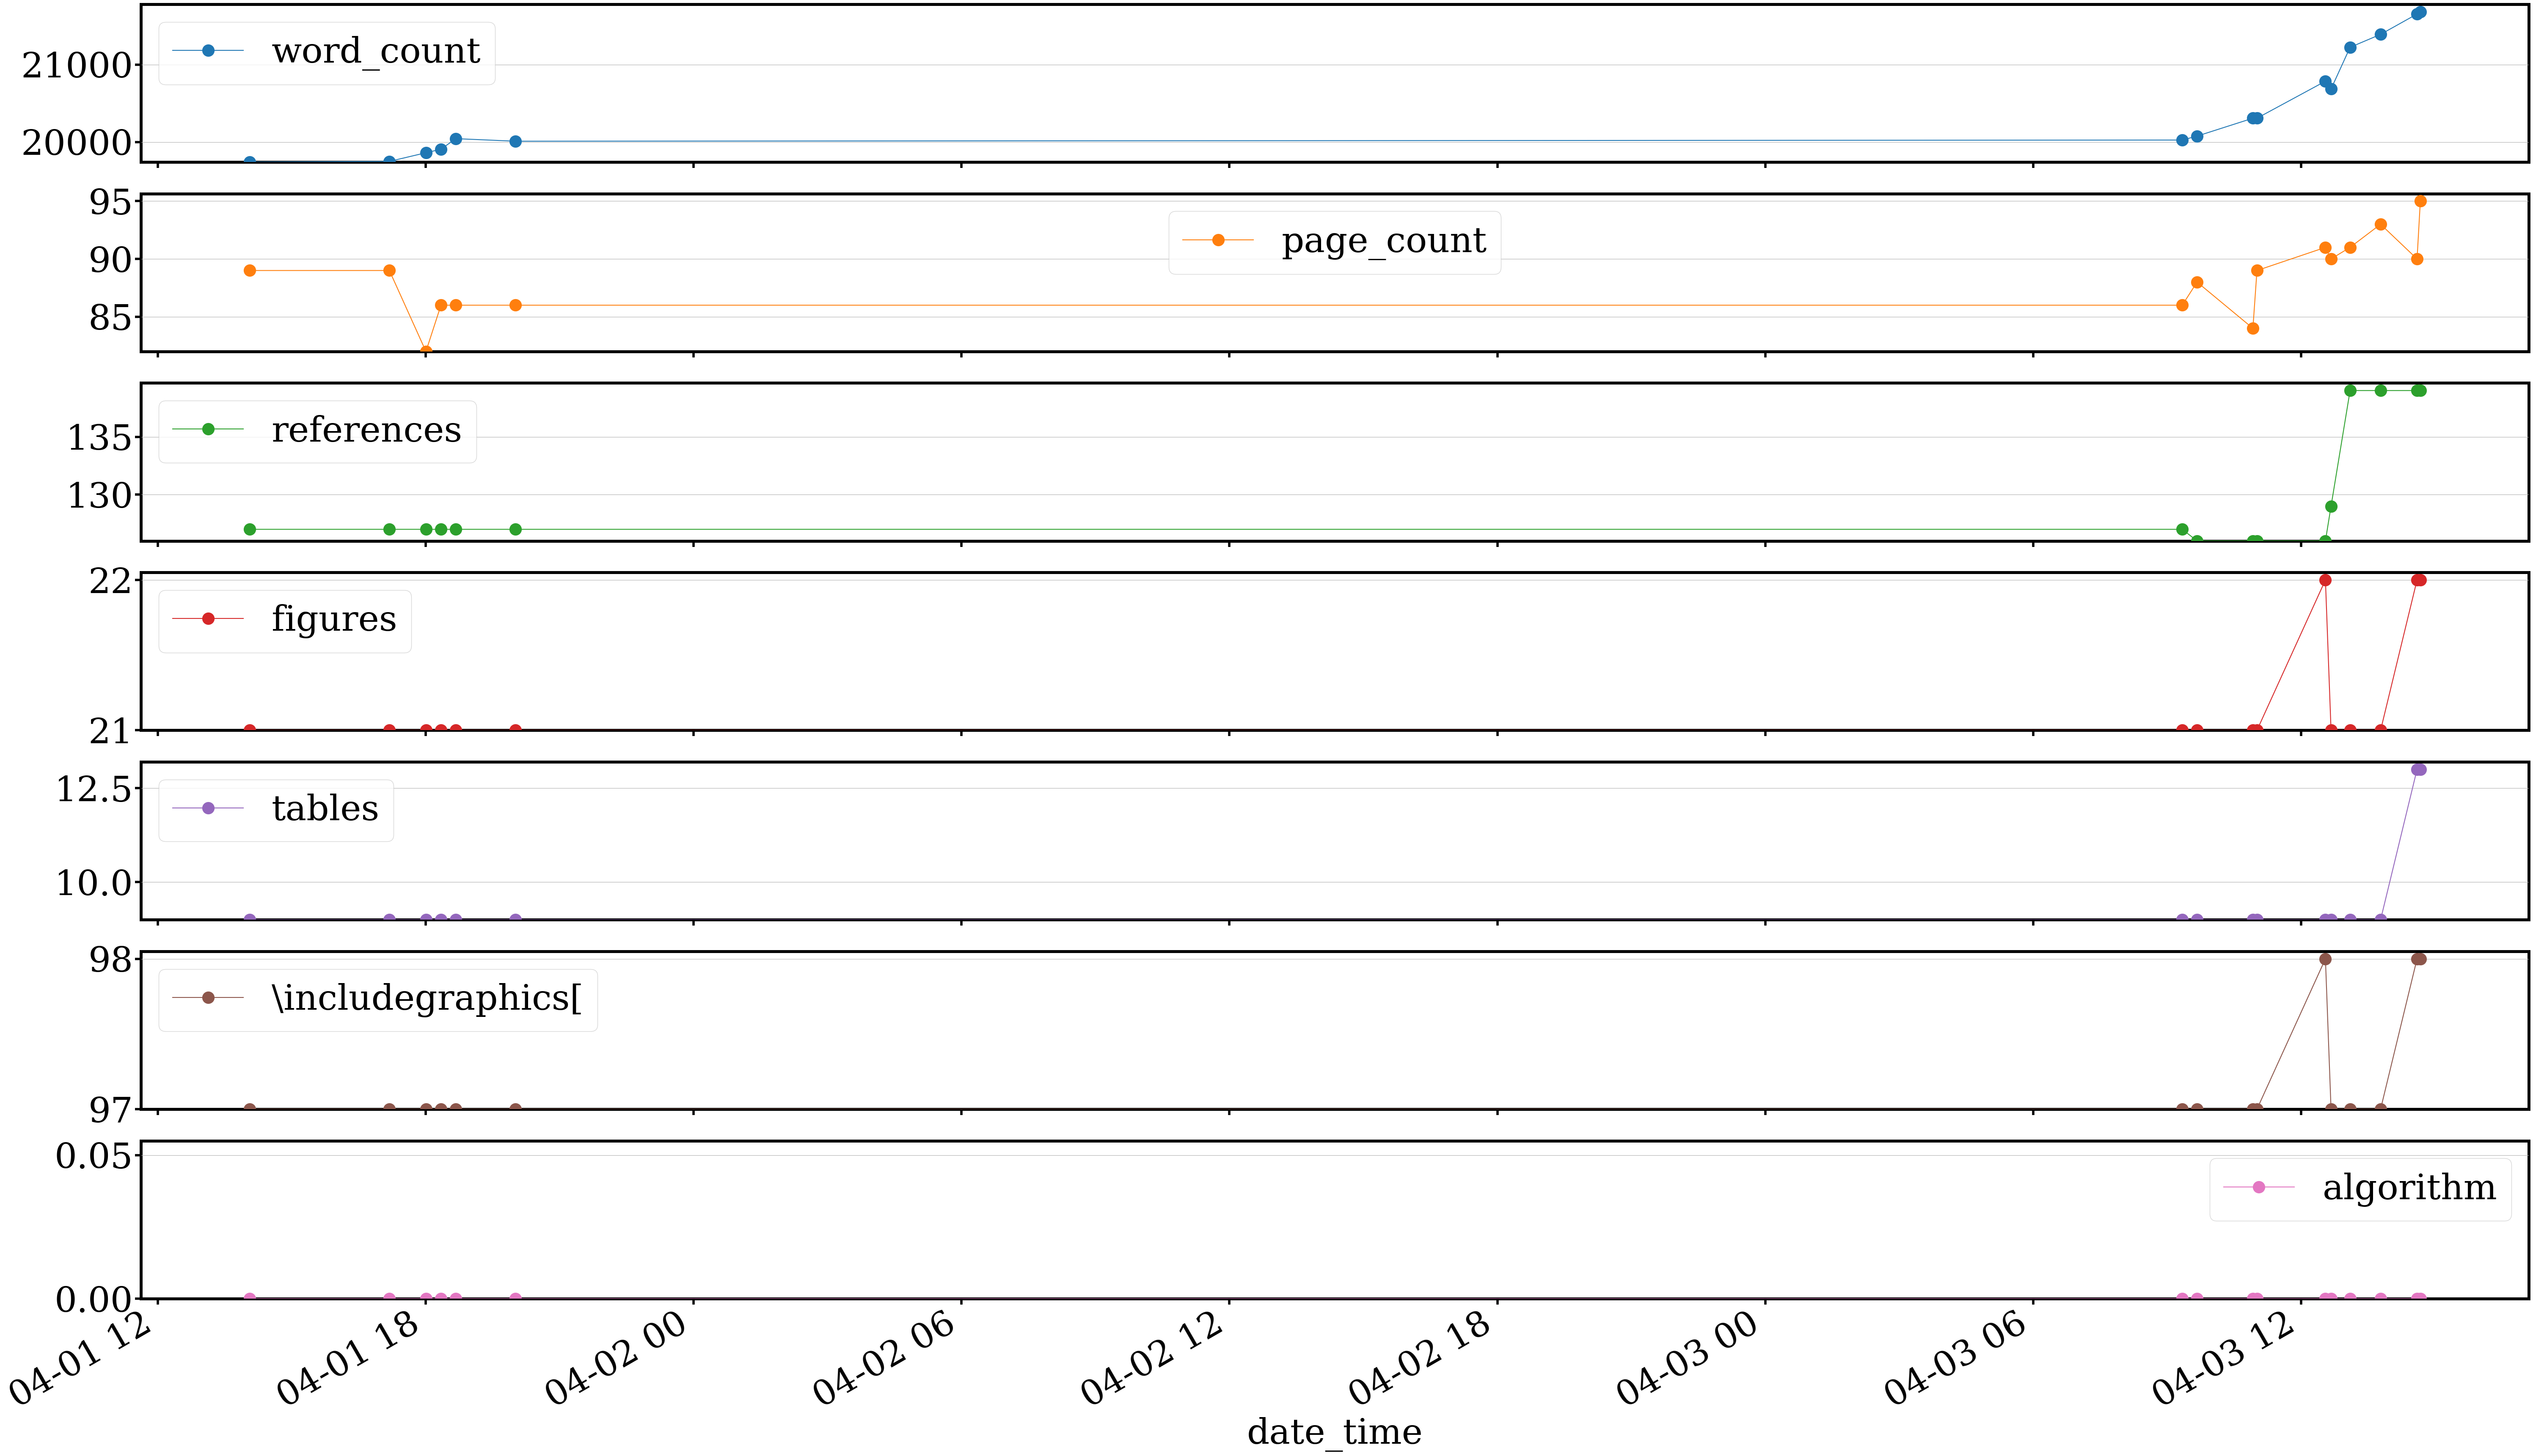

In [39]:
def plot_filt(df):

    sc = 5 * df.shape[1]
    # Filter data between two dates
    df_filt = df.loc[
        (df["date_time"] >= datetime.datetime(year=2023, month=4, day=1, hour=14))
    ]

    axs = df_filt.plot.line(
        subplots=True,
        x="date_time",
        figsize=(sc * 1.61803, sc),
        marker="o",
        markersize=20,
    )

    for ax in axs:
        ax.yaxis.grid()
        ax.patch.set_edgecolor("black")
        ax.patch.set_linewidth(5)
        ax.autoscale()
        # Find the minimum y value in the dataframe for each axis
        ycol = ax.get_lines()[0].get_label()
        min_val = df_filt[ycol].min()
        if np.isnan(min_val):
            min_val = 0
        # Set the lower limit of y-axis to the minimum value of y
        ax.set_ylim(bottom=min_val)

        # custom lines of points
        ax.xaxis.set_tick_params(width=4, length=10)
        ax.yaxis.set_tick_params(width=4, length=10)


plot_filt(df_thesis)

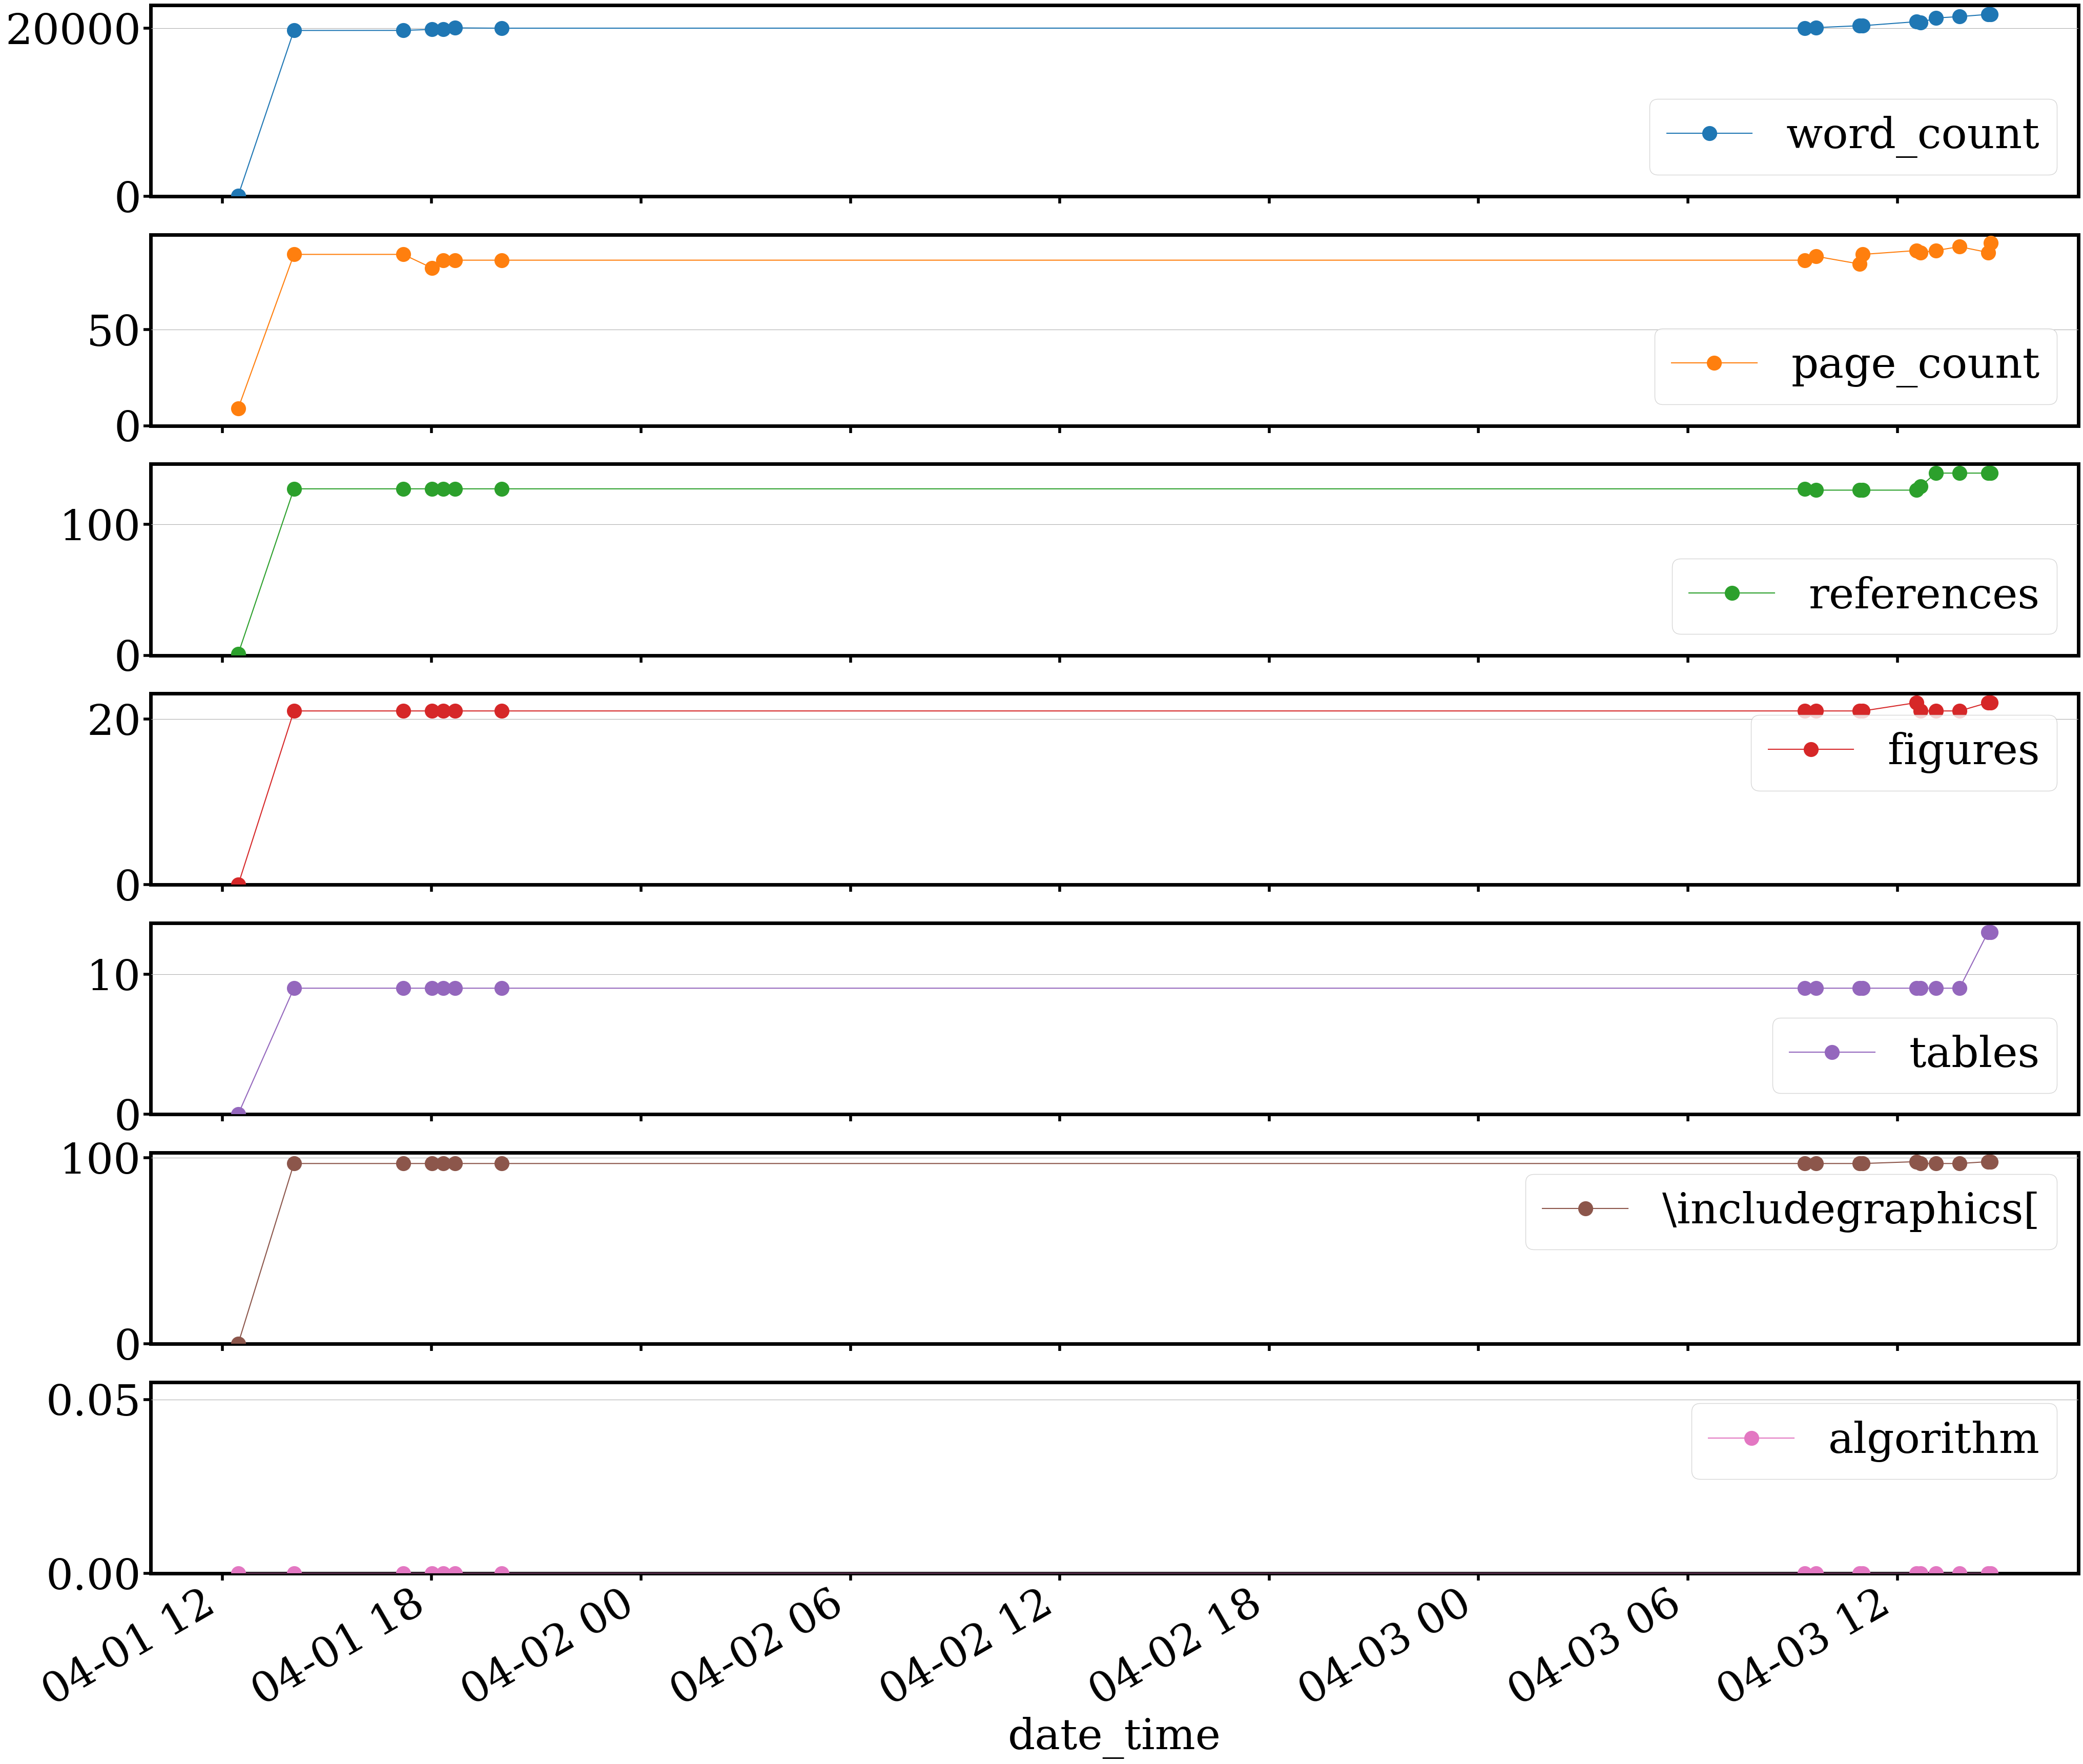

In [40]:
def default_plot(df):
    sc = 30

    axs = df.plot.line(
        subplots=True,
        x="date_time",
        figsize=(sc * 1.61803, sc * (df.shape[1] / 6)),
        marker="o",
        markersize=20,
    )

    for ax in axs:
        ax.yaxis.grid()
        ax.patch.set_edgecolor("black")
        ax.patch.set_linewidth(5)
        ax.autoscale()
        ax.set_ylim(0, None)
        # ax.set_ylim([None,]
        # custom lines of points
        ax.xaxis.set_tick_params(width=4, length=10)
        ax.yaxis.set_tick_params(width=4, length=10)


default_plot(df_thesis)

19742
82
127
21
9
97


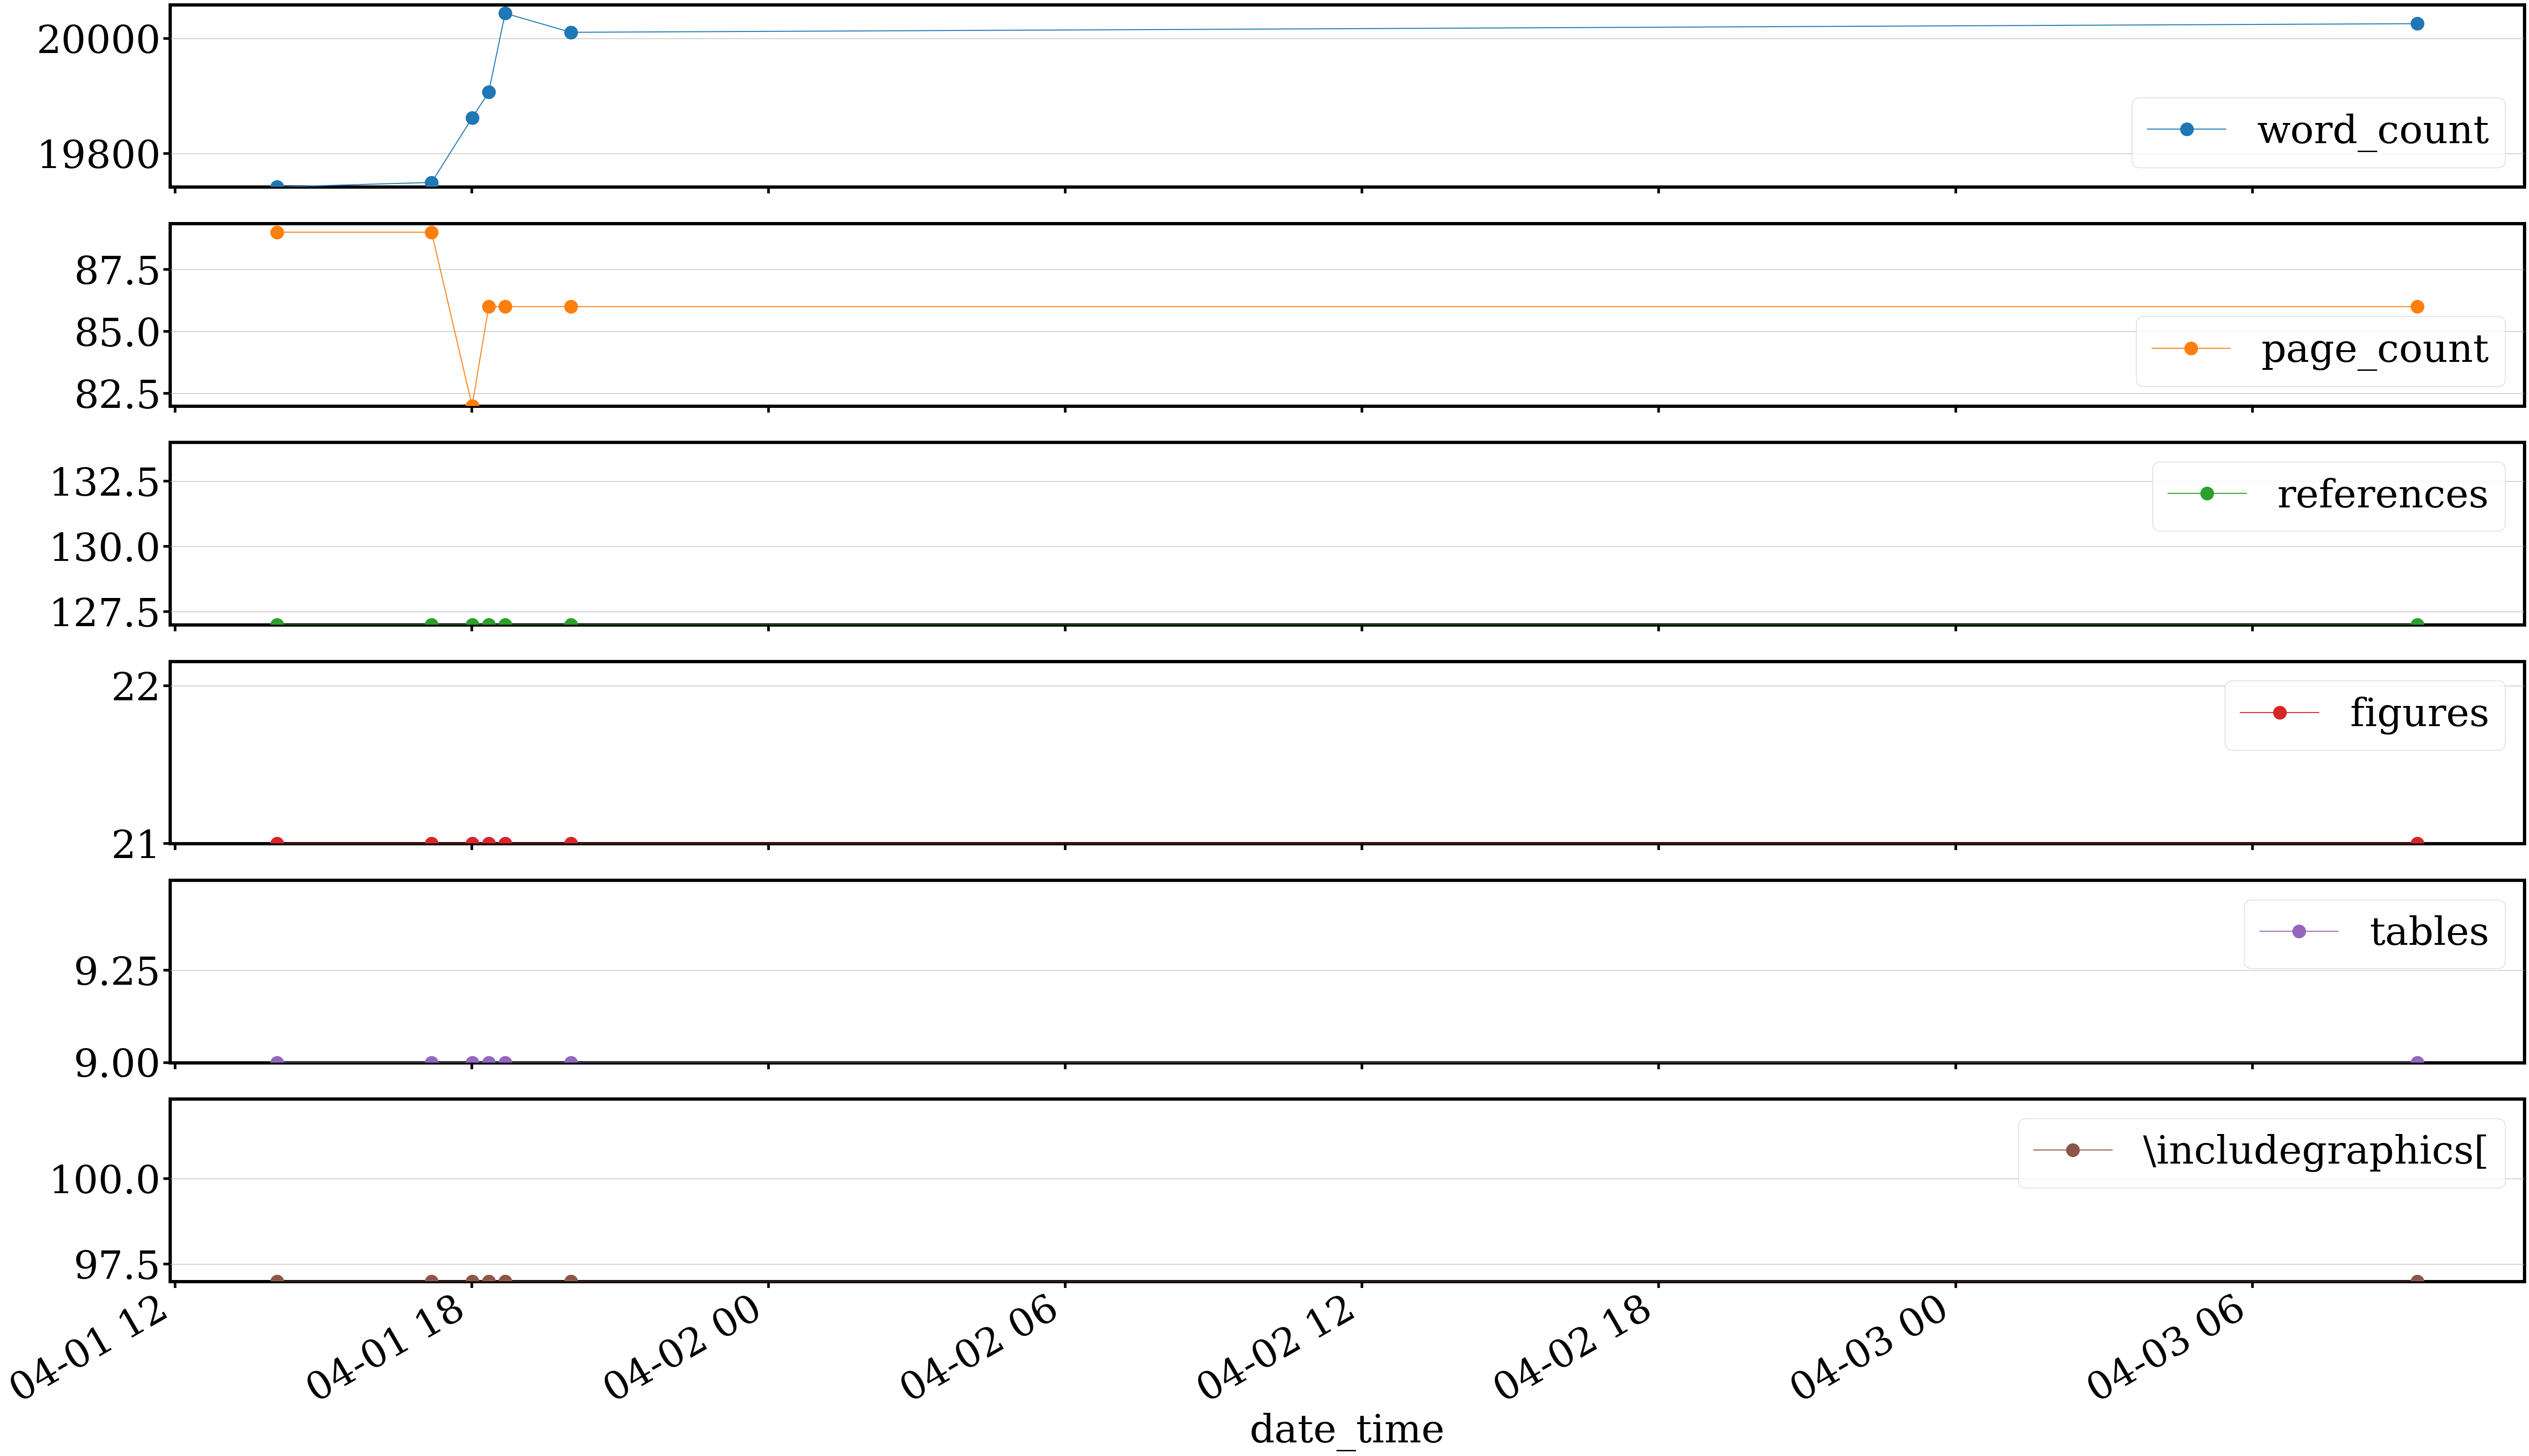